In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import pickle

<h4>PREPROCESSING/PREPARATION</h4>

In [9]:
# read raw/original version of data
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Feature Info:</br>
Booking_ID: unique identifier of each booking</br>
noofadults: Number of adults</br>
noofchildren: Number of Children</br>
noofweekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel</br>
noofweek_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel</br>
typeofmeal_plan: Type of meal plan booked by the customer:</br>
requiredcarparking_space: Does the customer require a car parking space? (0 - No, 1- Yes)</br>
roomtypereserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.</br>
lead_time: Number of days between the date of booking and the arrival date</br>
arrival_year: Year of arrival date</br>
arrival_month: Month of arrival date</br>
arrival_date: Date of the month</br>
marketsegmenttype: Market segment designation.</br>
repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)</br>
noofprevious_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking</br>
noofpreviousbookingsnot_canceled: Number of previous bookings not canceled by the customer prior to the current booking</br>
avgpriceper_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)</br>
noofspecial_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)</br>
booking_status: Flag indicating if the booking was canceled or not.</br>


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11814 entries, 0 to 11813
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            11814 non-null  int64  
 1   no_of_adults                          11814 non-null  int64  
 2   no_of_children                        11814 non-null  int64  
 3   no_of_weekend_nights                  11814 non-null  int64  
 4   no_of_week_nights                     11814 non-null  float64
 5   type_of_meal_plan                     11814 non-null  int64  
 6   required_car_parking_space            11814 non-null  int64  
 7   room_type_reserved                    11814 non-null  int64  
 8   lead_time                             11814 non-null  float64
 9   arrival_year                          11814 non-null  int64  
 10  arrival_month                         11814 non-null  int64  
 11  arrival_date   

Need to turn object features into categorical (numerical)

In [10]:
# get values for all object columns
print(df['type_of_meal_plan'].unique())
print(df['room_type_reserved'].unique())
print(df['market_segment_type'].unique())
print(df['booking_status'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
['Not_Canceled' 'Canceled']


In [11]:
# define functions and transform object-type features into int-type

def transform_meal_plan(x):
    if x == 'Meal Plan 1':
        return 1
    elif x == 'Meal Plan 2':
        return 2
    elif x == 'Meal Plan 3':
        return 3
    else:
        return 0
    
def transform_market_segment(x):
    if x == 'Offline':
        return 1
    elif x == 'Online':
        return 2
    elif x == 'Corporate':
        return 3
    elif x == 'Aviation':
        return 4
    else:
        return 5
    
df['type_of_meal_plan'] = df['type_of_meal_plan'].apply(transform_meal_plan)
df['room_type_reserved'] = df['room_type_reserved'].apply(lambda x: int(x[-1]))
df['market_segment_type'] = df['market_segment_type'].apply(transform_market_segment)
df['booking_status'] = df['booking_status'].apply(lambda x: 0 if x=='Canceled' else 1)
df['Booking_ID'] = df['Booking_ID'].apply(lambda x: int(x[3:]))
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,1
1,2,2,0,2,3,0,0,1,5,2018,11,6,2,0,0,0,106.68,1,1
2,3,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,0
3,4,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,0
4,5,2,0,1,1,0,0,1,48,2018,4,11,2,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36271,3,0,2,6,1,0,4,85,2018,8,3,2,0,0,0,167.80,1,1
36271,36272,2,0,1,3,1,0,1,228,2018,10,17,2,0,0,0,90.95,2,0
36272,36273,2,0,2,6,1,0,1,148,2018,7,1,2,0,0,0,98.39,2,1
36273,36274,2,0,0,3,0,0,1,63,2018,4,21,2,0,0,0,94.50,0,0


array([[<AxesSubplot:title={'center':'Booking_ID'}>,
        <AxesSubplot:title={'center':'no_of_adults'}>,
        <AxesSubplot:title={'center':'no_of_children'}>,
        <AxesSubplot:title={'center':'no_of_weekend_nights'}>],
       [<AxesSubplot:title={'center':'no_of_week_nights'}>,
        <AxesSubplot:title={'center':'type_of_meal_plan'}>,
        <AxesSubplot:title={'center':'required_car_parking_space'}>,
        <AxesSubplot:title={'center':'room_type_reserved'}>],
       [<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_year'}>,
        <AxesSubplot:title={'center':'arrival_month'}>,
        <AxesSubplot:title={'center':'arrival_date'}>],
       [<AxesSubplot:title={'center':'market_segment_type'}>,
        <AxesSubplot:title={'center':'repeated_guest'}>,
        <AxesSubplot:title={'center':'no_of_previous_cancellations'}>,
        <AxesSubplot:title={'center':'no_of_previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'ce

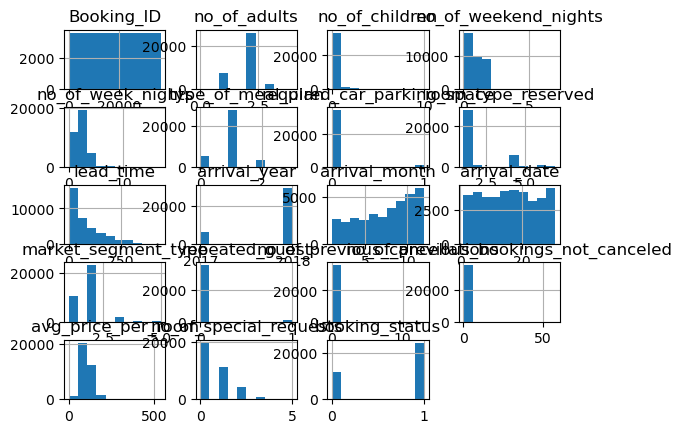

In [12]:
# look at skewness of variables, don't need to worry about nulls according to previous output
df.hist()

Everything except arrival_month, arrival_date, and booking_id is skewed

<AxesSubplot:>

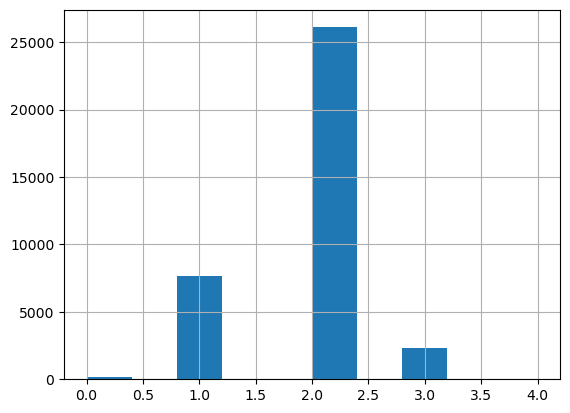

In [13]:
# inspect individual histograms
(df['no_of_adults']).hist()

In [ ]:
# record all necessary data transformations here to remove skewness

df = df[df['no_of_adults'] == 2]
df = df[df['no_of_children'] == 0]
df = df[df['no_of_weekend_nights'] <= 2]
df['no_of_week_nights'] = np.sqrt(df['no_of_week_nights'])
df = df[df['no_of_weekend_nights'] <= 2]
df = df[df['type_of_meal_plan'] < 3]
df = df[df['required_car_parking_space'] == 0]
df = df[df['room_type_reserved'] == 1]
df['lead_time'] = np.sqrt(df['lead_time'])
df = df[df['arrival_year'] == 2018]
df = df[(df['market_segment_type'] == 1) | (df['market_segment_type'] == 2)]
df = df[df['repeated_guest'] == 0]
df = df[df['no_of_previous_cancellations'] == 0]
df['avg_price_per_room'] = np.sqrt(df['avg_price_per_room'])
df = df[df['no_of_special_requests'] <= 2]

In [ ]:
# undersampling target feature to get more even spread of data

b0 = df[df['booking_status'] == 0]
b1 = df[df['booking_status'] == 1]

b1 = b1.sample(n=len(b0), replace=False)
df = pd.concat([b0, b1], axis='rows')

In [ ]:
df.to_csv('cleaned.csv', index=False) # save cleaned file

Now we have no nulls, and minimal skewness in variables; start applying models

<h4>TRAINING/TESTING</h4>

In [2]:
# read cleaned/preprocessed version of data

df = pd.read_csv('cleaned.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,4,2,0,0,1.001355,1,0,1,1.087219,2018,5,20,2,0,0,0,3.162278,0,0
1,5,2,0,1,1.000000,0,0,1,1.062354,2018,4,11,2,0,0,0,3.117870,0,0
2,6,2,0,0,1.001355,2,0,1,1.095653,2018,9,13,2,0,0,0,3.274722,1,0
3,13,2,0,2,1.000000,0,0,1,1.054581,2018,11,26,2,0,0,0,3.062814,0,0
4,16,2,0,0,1.001355,2,0,1,1.090508,2018,6,15,2,0,0,0,3.274722,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,30624,2,0,1,1.000000,1,0,1,1.060140,2018,8,15,1,0,0,0,2.957436,0,1
11810,13319,2,0,0,1.002711,1,0,1,1.074097,2018,4,27,2,0,0,0,3.157921,1,1
11811,18058,2,0,2,1.000000,1,0,1,1.068395,2018,12,24,2,0,0,0,3.110419,2,1
11812,33108,2,0,0,1.001355,1,0,1,1.054581,2018,6,2,1,0,0,0,3.439791,0,1


In [3]:
# split training and testing sets

x_train, x_test, y_train, y_test = train_test_split(df.drop('booking_status', axis='columns'), df['booking_status'], test_size = 0.3)

In [4]:
# create and fit model

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

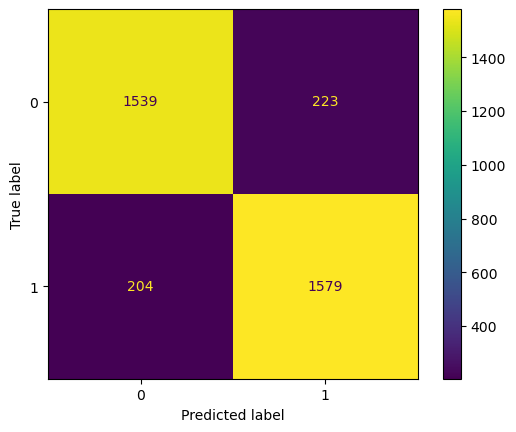

In [5]:
# test accuracy with predicted vs true

predicted = model.predict(x_test)
cm = confusion_matrix(y_test, predicted)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [6]:
(cm[0][0]+cm[1][1])/len(y_test) # calculate accuracy

0.8795486600846263

In [7]:
pickle.dump(model, open('final_model.sav', 'wb')) # save model (87%-88% accuracy)